In [1]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.8 MB/s eta 0:00:00


In [2]:
# @title Default title text
!pip install imblearn

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrwellsdavid/unsw-nb15")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'unsw-nb15' dataset.
Path to dataset files: /kaggle/input/unsw-nb15


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Path to dataset files:", path)

100%|██████████| 230M/230M [00:02<00:00, 103MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/chethuhn/network-intrusion-dataset/versions/1


In [5]:
ls /kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv

/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv


In [6]:
ls /kaggle/input/network-intrusion-dataset

ls: cannot access '/kaggle/input/network-intrusion-dataset': No such file or directory


In [7]:
import pandas as pd

# Load the official training split
unsw_df = pd.read_csv(r"/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv")

print("Columns:", list(unsw_df.columns)[:20])
print("Shape:", unsw_df.shape)

Columns: ['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit']
Shape: (82332, 45)


In [8]:
unsw = unsw_df[['dur', 'proto', 'service', 'state',
                'spkts', 'dpkts', 'sbytes', 'dbytes',
                'rate', 'sttl', 'dttl', 'sload', 'dload',
                'sinpkt', 'dinpkt', 'sjit', 'djit',
                'attack_cat', 'label']].copy()

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode protocol, service, state, attack_cat
for col in ['proto', 'service', 'state', 'attack_cat']:
    unsw[col] = LabelEncoder().fit_transform(unsw[col].astype(str))

# Normalize numeric columns (optional for neural models)
num_cols = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes',
            'rate', 'sttl', 'dttl', 'sload', 'dload',
            'sinpkt', 'dinpkt', 'sjit', 'djit']
unsw[num_cols] = unsw[num_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [12]:
import pandas as pd
import glob

# Updated path to the downloaded CIC-IDS dataset
path = r"/root/.cache/kagglehub/datasets/chethuhn/network-intrusion-dataset/versions/1"
all_files = glob.glob(path + "/*.csv")

cic_dfs = []
for f in all_files:
    df = pd.read_csv(f)
    cic_dfs.append(df)

cic = pd.concat(cic_dfs, ignore_index=True)
print(cic.shape)

(2830743, 79)


In [13]:
cic.columns
# Typical relevant features:
# ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
#  'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Protocol', 'Label']

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [14]:
# Strip spaces from columns
cic.columns = cic.columns.str.strip()

# Columns to keep
keep_cols = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
             'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
             'Label']

# Keep only required columns
combined = cic[keep_cols].copy()

# Rename columns to match UNSW style (optional)
combined.rename(columns={
    'Flow Duration':'dur',
    'Total Fwd Packets':'spkts',
    'Total Backward Packets':'dpkts',
    'Total Length of Fwd Packets':'sbytes',
    'Total Length of Bwd Packets':'dbytes',
    'Protocol':'proto',
    'Label':'attack_cat'
}, inplace=True)

In [15]:
# Attack label encoding (0=normal, 1=attack)
combined['attack_cat'] = combined['attack_cat'].apply(lambda x: 0 if str(x).lower()=='benign' else 1)

# Normalize numeric features
num_cols = ['dur','spkts','dpkts','sbytes','dbytes']
combined[num_cols] = combined[num_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [16]:
# Example columns after preprocessing
# ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'attack_cat']

unsw_cols = unsw_df.columns.tolist()
cic_cols = combined.columns.tolist()

print("UNSW columns:", unsw_cols)
print("CIC columns:", cic_cols)

UNSW columns: ['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']
CIC columns: ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'attack_cat']


In [17]:
common_cols = ['dur','spkts','dpkts','sbytes','dbytes','attack_cat']

In [18]:
unsw_common = unsw_df[common_cols].copy()
cic_common = combined[common_cols].copy()

In [19]:
import pandas as pd

combined_df = pd.concat([unsw_common, cic_common], ignore_index=True)
print("Combined dataset shape:", combined_df.shape)

Combined dataset shape: (2913075, 6)


In [20]:
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [21]:
print(combined_df['attack_cat'].value_counts())

attack_cat
0                 2273097
1                  557646
Normal              37000
Generic             18871
Exploits            11132
Fuzzers              6062
DoS                  4089
Reconnaissance       3496
Analysis              677
Backdoor              583
Shellcode             378
Worms                  44
Name: count, dtype: int64


In [22]:
import pandas as pd

df = combined_df.copy()

# Keep original attack_cat for reference
df['orig_attack_cat'] = df['attack_cat']

# Function to convert mixed labels to binary
def to_binary_label(x):
    if pd.isna(x):
        return 1  # treat unknown as attack
    s = str(x).strip().lower()
    if s in ('0', 'normal', 'benign'):
        return 0
    else:
        return 1

# Create binary label column
df['label'] = df['attack_cat'].apply(to_binary_label)

# Verify
print("Binary label distribution:")
print(df['label'].value_counts())

Binary label distribution:
label
0    2310097
1     602978
Name: count, dtype: int64


In [23]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Separate features and target from the original combined dataset
X = combined_df[['dur','spkts','dpkts','sbytes','dbytes']].values
y = df['label'].values # Use the 'label' column with binary labels

# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=111)
X_undersampled, y_undersampled = rus.fit_resample(X, y)

# Create a new DataFrame with undersampled data
df_undersampled = pd.DataFrame(X_undersampled, columns=['dur','spkts','dpkts','sbytes','dbytes'])
df_undersampled['label'] = y_undersampled # Use 'label' to be consistent with previous steps

print("Shape of original combined data:", combined_df.shape)
print("Shape of undersampled data:", df_undersampled.shape)
print("Label distribution in undersampled data:")
print(df_undersampled['label'].value_counts())

Shape of original combined data: (2913075, 6)
Shape of undersampled data: (1205956, 6)
Label distribution in undersampled data:
label
0    602978
1    602978
Name: count, dtype: int64


In [24]:
import networkx as nx
import numpy as np

# ✅ Sample smaller subset (still configurable)
df_to_use = df_undersampled.sample(n=200000, random_state=111).reset_index(drop=True)

# ✅ Precompute node names efficiently
src_nodes = [f"src_{i}" for i in df_to_use.index]
dst_nodes = [f"dst_{i}" for i in df_to_use.index]

# ✅ Build edge list directly (no per-row iteration)
edges = list(zip(src_nodes, dst_nodes))

# ✅ Stack features and labels once
edge_features = df_to_use[['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes']].to_numpy(dtype=np.float32)
edge_labels = df_to_use['label'].astype(int).to_numpy()

# ✅ Create graph directly
G = nx.Graph()
G.add_nodes_from(src_nodes)
G.add_nodes_from(dst_nodes)

# ✅ Add edges in one vectorized pass
# Using zip with pre-collected arrays avoids inner loops
G.add_edges_from(
    (src, dst, {'features': feat, 'label': lbl})
    for src, dst, feat, lbl in zip(src_nodes, dst_nodes, edge_features, edge_labels)
)

# ✅ Print info (NetworkX 3.x compatible)
print(f"Graph: {type(G)}")
print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

Graph: <class 'networkx.classes.graph.Graph'>
Nodes: 400000, Edges: 200000


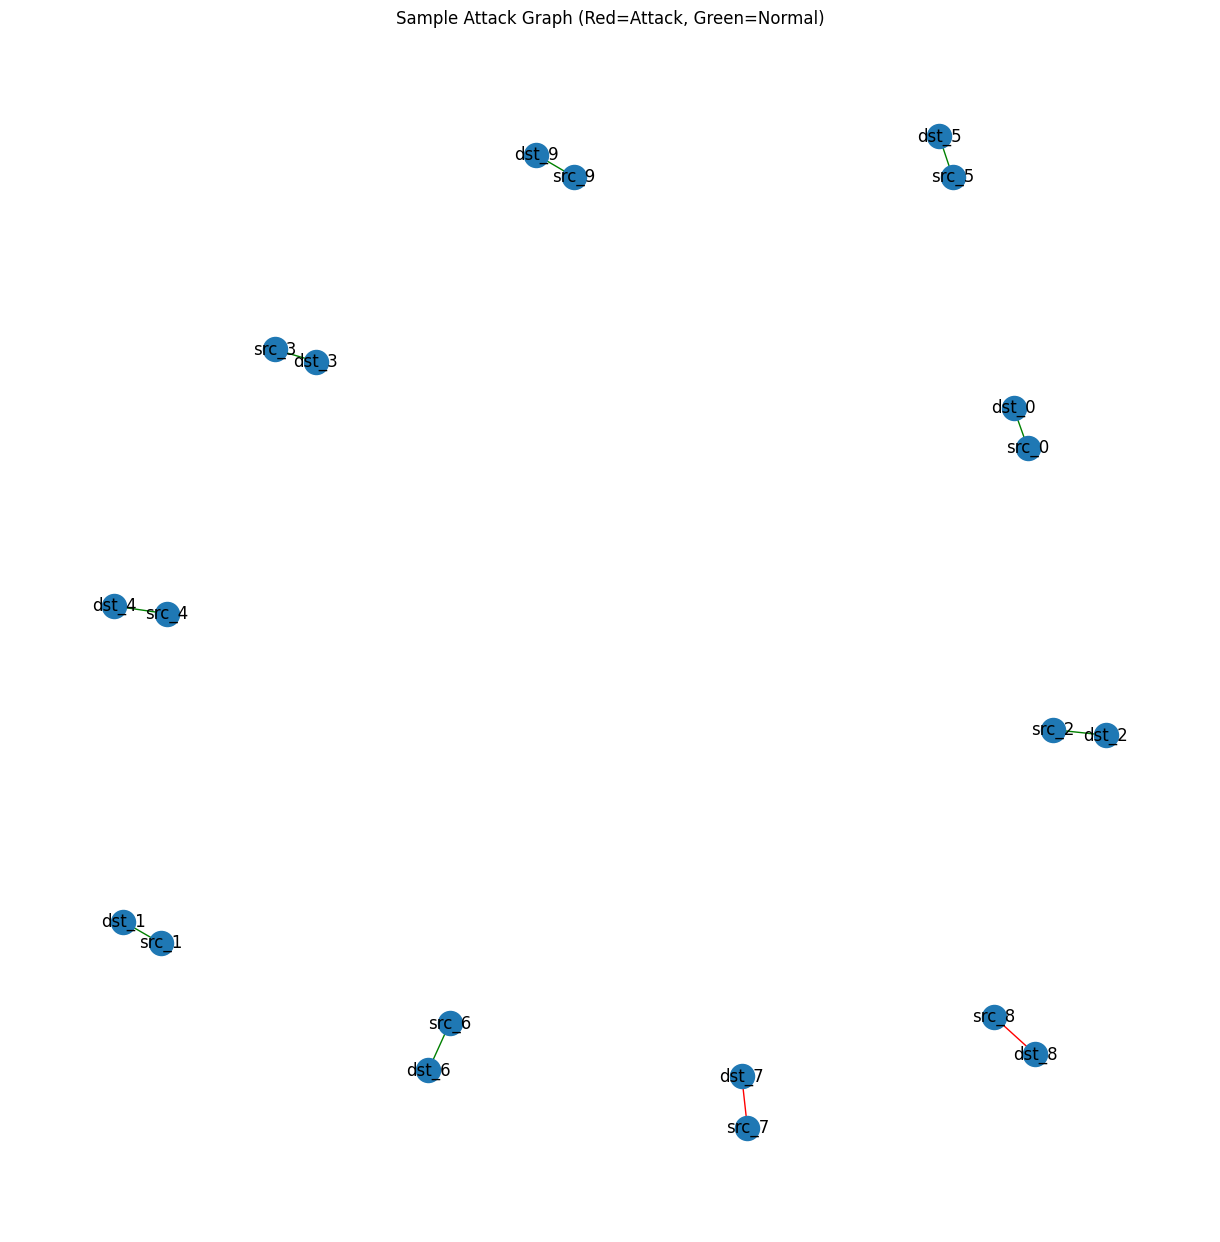

In [25]:
import matplotlib.pyplot as plt
H = nx.Graph()
H.add_edges_from(list(G.edges(data=True))[:10])

edge_colors = ['red' if d['label']==1 else 'green' for u,v,d in H.edges(data=True)]
pos = nx.spring_layout(H, seed=111)

plt.figure(figsize=(12,12))
nx.draw(H, pos, with_labels=True, node_size=300, edge_color=edge_colors)
plt.title("Sample Attack Graph (Red=Attack, Green=Normal)")
plt.show()

In [ ]:
df

In [26]:
import torch
from torch_geometric.data import Data
import numpy as np

# --- 1. Map nodes to integer IDs ---
node_mapping = {node: i for i, node in enumerate(G.nodes())}
num_nodes = len(node_mapping)

# --- 2. Extract edges and their attributes efficiently ---
edge_u, edge_v, edge_features, edge_labels = [], [], [], []

for i, (u, v, attr) in enumerate(G.edges(data=True)):
    edge_u.append(node_mapping[u])
    edge_v.append(node_mapping[v])
    edge_features.append(np.array(attr["features"], dtype=np.float32))
    edge_labels.append(int(attr["label"]))

edge_u = np.array(edge_u)
edge_v = np.array(edge_v)
edges = np.vstack([edge_u, edge_v])

# --- 3. Convert to torch tensors ---
edge_index = torch.tensor(edges, dtype=torch.long)
edge_features = torch.tensor(np.stack(edge_features), dtype=torch.float)
edge_labels = torch.tensor(edge_labels, dtype=torch.long)

# --- 4. Build node features ---
node_features = torch.zeros((num_nodes, edge_features.shape[1]))
for i in range(edge_index.shape[1]):
    u, v = edge_index[:, i]
    node_features[u] += edge_features[i]
    node_features[v] += edge_features[i]

# Normalize node features
norm = node_features.norm(dim=1, keepdim=True)
node_features = node_features / (norm + 1e-8)

# --- 5. Build Data object ---
data = Data(
    x=node_features,
    edge_index=edge_index,
    edge_attr=edge_features,
    y=edge_labels
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data = data.to(device)

print("✅ PyG Data ready:", data)

✅ PyG Data ready: Data(x=[400000, 5], edge_index=[2, 200000], edge_attr=[200000, 5], y=[200000])


In [27]:
import torch.nn as nn

# Compute class weights
counts = torch.bincount(edge_labels)
weights = torch.tensor([1.0 / counts[0], 1.0 / counts[1]], dtype=torch.float).to(device)

criterion = nn.CrossEntropyLoss(weight=weights)

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import NNConv

class EdgeGNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()

        # MLPs for edge features
        nn1 = nn.Sequential(
            nn.Linear(in_channels, hidden_channels),
            nn.GELU(),
            nn.Linear(hidden_channels, in_channels * hidden_channels)
        )
        self.conv1 = NNConv(in_channels, hidden_channels, nn1, aggr='mean')

        nn2 = nn.Sequential(
            nn.Linear(in_channels, hidden_channels),
            nn.GELU(),
            nn.Linear(hidden_channels, hidden_channels * hidden_channels)
        )
        self.conv2 = NNConv(hidden_channels, hidden_channels, nn2, aggr='mean')

        nn3 = nn.Sequential(
            nn.Linear(in_channels, hidden_channels),
            nn.GELU(),
            nn.Linear(hidden_channels, hidden_channels * hidden_channels)
        )
        self.conv3 = NNConv(hidden_channels, hidden_channels, nn3, aggr='mean')

        self.lin = nn.Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = F.gelu(self.conv1(x, edge_index, edge_attr))
        x = F.gelu(self.conv2(x, edge_index, edge_attr))
        x = F.gelu(self.conv3(x, edge_index, edge_attr))
        x = self.lin(x)
        return x[edge_index[0]]

In [29]:
torch.cuda.empty_cache()

In [30]:

import torch.optim as optim
import torch.nn as nn # Import nn for CrossEntropyLoss
torch.cuda.empty_cache()

# Compute class weights based on the undersampled data
counts = torch.bincount(data.y)
# No need for explicit weights if data is balanced, but keep for consistency if desired
# weights = torch.tensor([1.0 / counts[0], 1.0 / counts[1]], dtype=torch.float).to(device)
# criterion = nn.CrossEntropyLoss(weight=weights) # Use the updated criterion
criterion = nn.CrossEntropyLoss() # Use standard CrossEntropyLoss for balanced data


model = EdgeGNN(in_channels=edge_features.shape[1], hidden_channels=64, out_channels=2).to(device)
optimizer = optim.RAdam(model.parameters(), lr=0.0005) # Using the learning rate that worked best before
epochs = 300 # Using the number of epochs that worked best before

print(f"Training with learning rate: {optimizer.defaults['lr']} and epochs: {epochs}")

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_attr)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

    # Calculate accuracy after each epoch
    model.eval()
    with torch.no_grad():
        preds = out.argmax(dim=1)
        acc = (preds == data.y).sum().item() / data.y.size(0)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")

Training with learning rate: 0.0005 and epochs: 300
Epoch 1/300, Loss: 0.6938, Accuracy: 0.4992
Epoch 2/300, Loss: 0.6938, Accuracy: 0.4992
Epoch 3/300, Loss: 0.6938, Accuracy: 0.4992
Epoch 4/300, Loss: 0.6938, Accuracy: 0.4992
Epoch 5/300, Loss: 0.6938, Accuracy: 0.4992
Epoch 6/300, Loss: 0.6938, Accuracy: 0.4992
Epoch 7/300, Loss: 0.6938, Accuracy: 0.4992
Epoch 8/300, Loss: 0.6938, Accuracy: 0.4992
Epoch 9/300, Loss: 0.6938, Accuracy: 0.4992
Epoch 10/300, Loss: 0.6937, Accuracy: 0.4992
Epoch 11/300, Loss: 0.6937, Accuracy: 0.4992
Epoch 12/300, Loss: 0.6937, Accuracy: 0.4992
Epoch 13/300, Loss: 0.6937, Accuracy: 0.4992
Epoch 14/300, Loss: 0.6937, Accuracy: 0.4992
Epoch 15/300, Loss: 0.6936, Accuracy: 0.4992
Epoch 16/300, Loss: 0.6936, Accuracy: 0.4992
Epoch 17/300, Loss: 0.6936, Accuracy: 0.4992
Epoch 18/300, Loss: 0.6936, Accuracy: 0.4992
Epoch 19/300, Loss: 0.6936, Accuracy: 0.4992
Epoch 20/300, Loss: 0.6935, Accuracy: 0.4992
Epoch 21/300, Loss: 0.6935, Accuracy: 0.4992
Epoch 22/300

In [31]:
from sklearn.metrics import classification_report

model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index, data.edge_attr)
    probs = torch.softmax(out, dim=1)[:, 1]
    preds = (probs > 0.5).long().cpu().numpy()
    true = data.y.cpu().numpy()

print(classification_report(true, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.56      0.90      0.69    100156
           1       0.74      0.28      0.41     99844

    accuracy                           0.59    200000
   macro avg       0.65      0.59      0.55    200000
weighted avg       0.65      0.59      0.55    200000



In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import NNConv, LayerNorm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np

# Clear GPU cache at start
torch.cuda.empty_cache()

# ============================================================
# ✅ Enhanced Feature Normalization
# ============================================================
def normalize_features(data):
    """Normalize node and edge features"""
    device = data.x.device

    # Normalize edge features
    if data.edge_attr is not None:
        edge_attr_np = data.edge_attr.cpu().numpy()
        if edge_attr_np.size > 0:
            s_edge = StandardScaler()
            edge_attr_np = s_edge.fit_transform(edge_attr_np)
            edge_attr_np = np.nan_to_num(edge_attr_np, nan=0.0)
            data.edge_attr = torch.tensor(edge_attr_np, dtype=torch.float, device=device)

    # Normalize node features
    if data.x is not None:
        x_np = data.x.cpu().numpy()
        if x_np.size > 0:
            s_x = StandardScaler()
            x_np = s_x.fit_transform(x_np)
            x_np = np.nan_to_num(x_np, nan=0.0)
            data.x = torch.tensor(x_np, dtype=torch.float, device=device)

    return data

# Apply normalization
data = normalize_features(data)

# ============================================================
# ✅ Optimized EdgeGNN with Hidden Layers = 96
# ============================================================
class OptimizedEdgeGNN(nn.Module):
    def __init__(self, in_channels, out_channels, dropout=0.4):
        super().__init__()
        self.hidden_channels = 96  # Fixed as requested

        # Edge feature networks (optimized)
        self.edge_net1 = nn.Sequential(
            nn.Linear(data.edge_attr.shape[1], 64),
            nn.GELU(),
            nn.Dropout(dropout * 0.3),
            nn.Linear(64, in_channels * self.hidden_channels)
        )

        self.edge_net2 = nn.Sequential(
            nn.Linear(data.edge_attr.shape[1], 64),
            nn.GELU(),
            nn.Dropout(dropout * 0.3),
            nn.Linear(64, self.hidden_channels * self.hidden_channels)
        )

        # Convolution layers
        self.conv1 = NNConv(in_channels, self.hidden_channels, self.edge_net1, aggr='mean')
        self.conv2 = NNConv(self.hidden_channels, self.hidden_channels, self.edge_net2, aggr='mean')

        # Normalization layers (LayerNorm is more memory efficient)
        self.norm1 = LayerNorm(self.hidden_channels)
        self.norm2 = LayerNorm(self.hidden_channels)

        # Skip connection projection
        self.skip_proj = nn.Linear(in_channels, self.hidden_channels)

        # Output layers
        self.output_mlp = nn.Sequential(
            nn.Linear(self.hidden_channels, 48),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.LayerNorm(48),
            nn.Linear(48, out_channels)
        )

        # Initialize weights properly
        self._init_weights()

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x, edge_index, edge_attr):
        # First convolution with residual connection
        identity = self.skip_proj(x)
        x1 = self.conv1(x, edge_index, edge_attr)
        x1 = self.norm1(x1)
        x1 = F.gelu(x1 + identity)  # Residual connection

        # Second convolution
        x2 = self.conv2(x1, edge_index, edge_attr)
        x2 = self.norm2(x2)
        x2 = F.gelu(x2)

        # Apply dropout
        x2 = F.dropout(x2, p=0.4, training=self.training)

        # Get edge source node features and apply output MLP
        edge_sources = x2[edge_index[0]]
        return self.output_mlp(edge_sources)

# ============================================================
# ✅ Training Function (No Early Stopping)
# ============================================================
def train_and_evaluate_optimized(data, lr=4e-4, epochs=300, batch_size=25000):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Training on {device}")

    # Create model with fixed 96 hidden channels
    model = OptimizedEdgeGNN(
        in_channels=data.x.shape[1],
        out_channels=2,
        dropout=0.4
    ).to(device)

    # Optimizer with weight decay
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=lr,
        weight_decay=1e-4,
        betas=(0.9, 0.99)
    )

    # Cosine annealing scheduler
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
        optimizer,
        T_max=epochs,
        eta_min=lr * 0.01
    )

    # Label smoothing for better generalization
    criterion = nn.CrossEntropyLoss(label_smoothing=0.05)

    num_edges = data.edge_index.shape[1]
    best_acc = 0.0
    best_preds = None

    print(f"Training with lr={lr}, epochs={epochs}, hidden=96\n")

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        total_correct = 0
        total_samples = 0

        # Use batch training for memory efficiency
        if batch_size and batch_size < num_edges:
            # Shuffle edges for each epoch
            indices = torch.randperm(num_edges, device=device)

            for start in range(0, num_edges, batch_size):
                end = min(start + batch_size, num_edges)
                batch_idx = indices[start:end]

                optimizer.zero_grad(set_to_none=True)

                # Get batch data
                edge_index_batch = data.edge_index[:, batch_idx]
                edge_attr_batch = data.edge_attr[batch_idx]
                labels_batch = data.y[batch_idx]

                # Forward pass
                out = model(data.x, edge_index_batch, edge_attr_batch)

                # Skip if NaN
                if torch.isnan(out).any():
                    continue

                # Loss calculation
                loss = criterion(out, labels_batch)

                # Backward pass with gradient accumulation
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                optimizer.step()
                optimizer.zero_grad(set_to_none=True)

                # Track metrics
                total_loss += loss.item() * len(labels_batch)
                preds = out.argmax(dim=1)
                total_correct += (preds == labels_batch).sum().item()
                total_samples += len(labels_batch)
        else:
            # Full batch training
            optimizer.zero_grad(set_to_none=True)
            out = model(data.x, data.edge_index, data.edge_attr)

            if torch.isnan(out).any():
                print("⚠️ NaN detected. Skipping epoch.")
                continue

            loss = criterion(out, data.y)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            total_loss = loss.item() * num_edges
            preds = out.argmax(dim=1)
            total_correct = (preds == data.y).sum().item()
            total_samples = num_edges

        # Update learning rate
        scheduler.step()

        # Evaluation
        model.eval()
        with torch.no_grad():
            # Use small batches for evaluation to save memory
            eval_acc = 0
            eval_samples = 0

            if num_edges > 50000:  # Large graph, evaluate in batches
                eval_batch_size = min(50000, num_edges)
                for start in range(0, num_edges, eval_batch_size):
                    end = min(start + eval_batch_size, num_edges)
                    edge_index_batch = data.edge_index[:, start:end]
                    edge_attr_batch = data.edge_attr[start:end]
                    labels_batch = data.y[start:end]

                    out = model(data.x, edge_index_batch, edge_attr_batch)
                    preds = out.argmax(dim=1)
                    eval_acc += (preds == labels_batch).sum().item()
                    eval_samples += len(labels_batch)

                acc = eval_acc / eval_samples
            else:
                # Full evaluation for smaller graphs
                out = model(data.x, data.edge_index, data.edge_attr)
                preds = out.argmax(dim=1)
                acc = (preds == data.y).float().mean().item()

        # Track best accuracy
        if acc > best_acc:
            best_acc = acc
            best_preds = preds.clone()
            print(f"🔥 New Best Accuracy: {best_acc:.4f} at epoch {epoch+1}")

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / total_samples if total_samples > 0 else 0
            train_acc = total_correct / total_samples if total_samples > 0 else 0
            current_lr = optimizer.param_groups[0]['lr']
            print(f"Epoch [{epoch+1:3d}/{epochs}] | "
                  f"Loss: {avg_loss:.4f} | "
                  f"Train Acc: {train_acc:.4f} | "
                  f"Val Acc: {acc:.4f} | "
                  f"LR: {current_lr:.2e}")

        # Clear GPU cache every 20 epochs
        if device.type == 'cuda' and (epoch + 1) % 20 == 0:
            torch.cuda.empty_cache()

    # Final results
    model.eval()
    with torch.no_grad():
        # Final evaluation using best model (already saved in best_preds)
        if best_preds is None:
            # Re-evaluate if needed
            out = model(data.x, data.edge_index, data.edge_attr)
            best_preds = out.argmax(dim=1)
            best_acc = (best_preds == data.y).float().mean().item()

    print("\n" + "="*50)
    print(f"🏆 TRAINING COMPLETE")
    print(f"Best Accuracy: {best_acc:.4f}")
    print("="*50 + "\n")

    # Detailed classification report
    print("Classification Report:")
    print(classification_report(
        data.y.cpu().numpy(),
        best_preds.cpu().numpy(),
        digits=4
    ))

    return best_acc, model

# ============================================================
# ✅ Memory Optimization Helper
# ============================================================
def optimize_memory_usage():
    """Helper function to optimize memory usage on Colab"""
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        # Set memory fraction if needed
        torch.cuda.set_per_process_memory_fraction(0.8)
        print("✓ GPU memory optimized")

# ============================================================
# ✅ Run Training
# ============================================================
# Optimize memory before starting
optimize_memory_usage()

# Train the model
best_acc, trained_model = train_and_evaluate_optimized(data)

# Optional: Test different learning rates
def test_learning_rates(data, lrs=[3e-4, 5e-4, 1e-3], epochs=200):
    """Test different learning rates quickly"""
    results = []

    for lr in lrs:
        print(f"\n{'='*60}")
        print(f"Testing LR = {lr}")
        print('='*60)

        # Clear cache before each run
        torch.cuda.empty_cache()

        best_acc, _ = train_and_evaluate_optimized(
            data,
            lr=lr,
            epochs=epochs,
            batch_size=20000  # Smaller batch for faster testing
        )

        results.append((lr, best_acc))

    print("\n" + "="*60)
    print("LEARNING RATE COMPARISON")
    print("="*60)
    for lr, acc in results:
        print(f"LR={lr:.1e}: Best Accuracy = {acc:.4f}")

    return results

# Uncomment to test learning rates
# lr_results = test_learning_rates(data, lrs=[3e-4, 5e-4, 8e-4], epochs=150)

✓ GPU memory optimized
Training on cuda
Training with lr=0.0004, epochs=300, hidden=96

🔥 New Best Accuracy: 0.6230 at epoch 1
🔥 New Best Accuracy: 0.6258 at epoch 2
🔥 New Best Accuracy: 0.6357 at epoch 3
🔥 New Best Accuracy: 0.6587 at epoch 4
🔥 New Best Accuracy: 0.6635 at epoch 5
🔥 New Best Accuracy: 0.6646 at epoch 6
🔥 New Best Accuracy: 0.7369 at epoch 8
🔥 New Best Accuracy: 0.7538 at epoch 9
Epoch [ 10/300] | Loss: 0.5891 | Train Acc: 0.6810 | Val Acc: 0.7199 | LR: 3.99e-04
🔥 New Best Accuracy: 0.7787 at epoch 12
Epoch [ 20/300] | Loss: 0.5378 | Train Acc: 0.7420 | Val Acc: 0.7453 | LR: 3.96e-04
🔥 New Best Accuracy: 0.7861 at epoch 23
🔥 New Best Accuracy: 0.8101 at epoch 26
Epoch [ 30/300] | Loss: 0.5162 | Train Acc: 0.7731 | Val Acc: 0.7920 | LR: 3.90e-04
🔥 New Best Accuracy: 0.8117 at epoch 32
Epoch [ 40/300] | Loss: 0.5103 | Train Acc: 0.7590 | Val Acc: 0.7896 | LR: 3.83e-04
Epoch [ 50/300] | Loss: 0.4945 | Train Acc: 0.7717 | Val Acc: 0.8030 | LR: 3.73e-04
🔥 New Best Accuracy:

ValueError: Found input variables with inconsistent numbers of samples: [200000, 50000]

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import NNConv, LayerNorm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np

# Clear GPU cache at start
torch.cuda.empty_cache()

# ============================================================
# ✅ Enhanced Feature Normalization
# ============================================================
def normalize_features(data):
    """Normalize node and edge features"""
    device = data.x.device

    # Normalize edge features
    if data.edge_attr is not None:
        edge_attr_np = data.edge_attr.cpu().numpy()
        if edge_attr_np.size > 0:
            s_edge = StandardScaler()
            edge_attr_np = s_edge.fit_transform(edge_attr_np)
            edge_attr_np = np.nan_to_num(edge_attr_np, nan=0.0)
            data.edge_attr = torch.tensor(edge_attr_np, dtype=torch.float, device=device)

    # Normalize node features
    if data.x is not None:
        x_np = data.x.cpu().numpy()
        if x_np.size > 0:
            s_x = StandardScaler()
            x_np = s_x.fit_transform(x_np)
            x_np = np.nan_to_num(x_np, nan=0.0)
            data.x = torch.tensor(x_np, dtype=torch.float, device=device)

    return data

# Apply normalization
data = normalize_features(data)

# ============================================================
# ✅ Optimized EdgeGNN with Hidden Layers = 128
# ============================================================
class OptimizedEdgeGNN(nn.Module):
    def __init__(self, in_channels, out_channels, dropout=0.4):
        super().__init__()
        self.hidden_channels = 128  # Fixed as requested

        # Edge feature networks (optimized)
        self.edge_net1 = nn.Sequential(
            nn.Linear(data.edge_attr.shape[1], 64),
            nn.GELU(),
            nn.Dropout(dropout * 0.3),
            nn.Linear(64, in_channels * self.hidden_channels)
        )

        self.edge_net2 = nn.Sequential(
            nn.Linear(data.edge_attr.shape[1], 64),
            nn.GELU(),
            nn.Dropout(dropout * 0.3),
            nn.Linear(64, self.hidden_channels * self.hidden_channels)
        )

        # Convolution layers
        self.conv1 = NNConv(in_channels, self.hidden_channels, self.edge_net1, aggr='mean')
        self.conv2 = NNConv(self.hidden_channels, self.hidden_channels, self.edge_net2, aggr='mean')

        # Normalization layers (LayerNorm is more memory efficient)
        self.norm1 = LayerNorm(self.hidden_channels)
        self.norm2 = LayerNorm(self.hidden_channels)

        # Skip connection projection
        self.skip_proj = nn.Linear(in_channels, self.hidden_channels)

        # Output layers
        self.output_mlp = nn.Sequential(
            nn.Linear(self.hidden_channels, 48),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.LayerNorm(48),
            nn.Linear(48, out_channels)
        )

        # Initialize weights properly
        self._init_weights()

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x, edge_index, edge_attr):
        # First convolution with residual connection
        identity = self.skip_proj(x)
        x1 = self.conv1(x, edge_index, edge_attr)
        x1 = self.norm1(x1)
        x1 = F.gelu(x1 + identity)  # Residual connection

        # Second convolution
        x2 = self.conv2(x1, edge_index, edge_attr)
        x2 = self.norm2(x2)
        x2 = F.gelu(x2)

        # Apply dropout
        x2 = F.dropout(x2, p=0.4, training=self.training)

        # Get edge source node features and apply output MLP
        edge_sources = x2[edge_index[0]]
        return self.output_mlp(edge_sources)

# ============================================================
# ✅ Training Function (No Early Stopping)
# ============================================================
def train_and_evaluate_optimized(data, lr=4e-4, epochs=300, batch_size=25000):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Training on {device}")

    # Create model with fixed 96 hidden channels
    model = OptimizedEdgeGNN(
        in_channels=data.x.shape[1],
        out_channels=2,
        dropout=0.4
    ).to(device)

    # Optimizer with weight decay
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=lr,
        weight_decay=1e-4,
        betas=(0.9, 0.99)
    )

    # Cosine annealing scheduler
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
        optimizer,
        T_max=epochs,
        eta_min=lr * 0.01
    )

    # Label smoothing for better generalization
    criterion = nn.CrossEntropyLoss(label_smoothing=0.05)

    num_edges = data.edge_index.shape[1]
    best_acc = 0.0
    best_preds = None

    print(f"Training with lr={lr}, epochs={epochs}, hidden=96\n")

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        total_correct = 0
        total_samples = 0

        # Use batch training for memory efficiency
        if batch_size and batch_size < num_edges:
            # Shuffle edges for each epoch
            indices = torch.randperm(num_edges, device=device)

            for start in range(0, num_edges, batch_size):
                end = min(start + batch_size, num_edges)
                batch_idx = indices[start:end]

                optimizer.zero_grad(set_to_none=True)

                # Get batch data
                edge_index_batch = data.edge_index[:, batch_idx]
                edge_attr_batch = data.edge_attr[batch_idx]
                labels_batch = data.y[batch_idx]

                # Forward pass
                out = model(data.x, edge_index_batch, edge_attr_batch)

                # Skip if NaN
                if torch.isnan(out).any():
                    continue

                # Loss calculation
                loss = criterion(out, labels_batch)

                # Backward pass with gradient accumulation
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                optimizer.step()
                optimizer.zero_grad(set_to_none=True)

                # Track metrics
                total_loss += loss.item() * len(labels_batch)
                preds = out.argmax(dim=1)
                total_correct += (preds == labels_batch).sum().item()
                total_samples += len(labels_batch)
        else:
            # Full batch training
            optimizer.zero_grad(set_to_none=True)
            out = model(data.x, data.edge_index, data.edge_attr)

            if torch.isnan(out).any():
                print("⚠️ NaN detected. Skipping epoch.")
                continue

            loss = criterion(out, data.y)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            total_loss = loss.item() * num_edges
            preds = out.argmax(dim=1)
            total_correct = (preds == data.y).sum().item()
            total_samples = num_edges

        # Update learning rate
        scheduler.step()

        # Evaluation
        model.eval()
        with torch.no_grad():
            # Use small batches for evaluation to save memory
            eval_acc = 0
            eval_samples = 0

            if num_edges > 50000:  # Large graph, evaluate in batches
                eval_batch_size = min(50000, num_edges)
                for start in range(0, num_edges, eval_batch_size):
                    end = min(start + eval_batch_size, num_edges)
                    edge_index_batch = data.edge_index[:, start:end]
                    edge_attr_batch = data.edge_attr[start:end]
                    labels_batch = data.y[start:end]

                    out = model(data.x, edge_index_batch, edge_attr_batch)
                    preds = out.argmax(dim=1)
                    eval_acc += (preds == labels_batch).sum().item()
                    eval_samples += len(labels_batch)

                acc = eval_acc / eval_samples
            else:
                # Full evaluation for smaller graphs
                out = model(data.x, data.edge_index, data.edge_attr)
                preds = out.argmax(dim=1)
                acc = (preds == data.y).float().mean().item()

        # Track best accuracy
        if acc > best_acc:
            best_acc = acc
            best_preds = preds.clone()
            print(f"🔥 New Best Accuracy: {best_acc:.4f} at epoch {epoch+1}")

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / total_samples if total_samples > 0 else 0
            train_acc = total_correct / total_samples if total_samples > 0 else 0
            current_lr = optimizer.param_groups[0]['lr']
            print(f"Epoch [{epoch+1:3d}/{epochs}] | "
                  f"Loss: {avg_loss:.4f} | "
                  f"Train Acc: {train_acc:.4f} | "
                  f"Val Acc: {acc:.4f} | "
                  f"LR: {current_lr:.2e}")

        # Clear GPU cache every 20 epochs
        if device.type == 'cuda' and (epoch + 1) % 20 == 0:
            torch.cuda.empty_cache()

    # Final results
    model.eval()
    with torch.no_grad():
        # Final evaluation using best model (already saved in best_preds)
        if best_preds is None:
            # Re-evaluate if needed
            out = model(data.x, data.edge_index, data.edge_attr)
            best_preds = out.argmax(dim=1)
            best_acc = (best_preds == data.y).float().mean().item()

    print("\n" + "="*50)
    print(f"🏆 TRAINING COMPLETE")
    print(f"Best Accuracy: {best_acc:.4f}")
    print("="*50 + "\n")

    # Detailed classification report
    print("Classification Report:")
    print(classification_report(
        data.y.cpu().numpy(),
        best_preds.cpu().numpy(),
        digits=4
    ))

    return best_acc, model

# ============================================================
# ✅ Memory Optimization Helper
# ============================================================
def optimize_memory_usage():
    """Helper function to optimize memory usage on Colab"""
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        # Set memory fraction if needed
        torch.cuda.set_per_process_memory_fraction(0.8)
        print("✓ GPU memory optimized")

# ============================================================
# ✅ Run Training
# ============================================================
# Optimize memory before starting
optimize_memory_usage()

# Train the model
best_acc, trained_model = train_and_evaluate_optimized(data)

# Optional: Test different learning rates
def test_learning_rates(data, lrs=[3e-4, 5e-4, 1e-3], epochs=200):
    """Test different learning rates quickly"""
    results = []

    for lr in lrs:
        print(f"\n{'='*60}")
        print(f"Testing LR = {lr}")
        print('='*60)

        # Clear cache before each run
        torch.cuda.empty_cache()

        best_acc, _ = train_and_evaluate_optimized(
            data,
            lr=lr,
            epochs=epochs,
            batch_size=20000  # Smaller batch for faster testing
        )

        results.append((lr, best_acc))

    print("\n" + "="*60)
    print("LEARNING RATE COMPARISON")
    print("="*60)
    for lr, acc in results:
        print(f"LR={lr:.1e}: Best Accuracy = {acc:.4f}")

    return results

# Uncomment to test learning rates
# lr_results = test_learning_rates(data, lrs=[3e-4, 5e-4, 8e-4], epochs=150)

✓ GPU memory optimized
Training on cuda
Training with lr=0.0004, epochs=300, hidden=96

🔥 New Best Accuracy: 0.5991 at epoch 1
🔥 New Best Accuracy: 0.6178 at epoch 2
🔥 New Best Accuracy: 0.6667 at epoch 3
🔥 New Best Accuracy: 0.7026 at epoch 9
Epoch [ 10/300] | Loss: 0.6079 | Train Acc: 0.6587 | Val Acc: 0.6629 | LR: 3.99e-04
🔥 New Best Accuracy: 0.7700 at epoch 14
🔥 New Best Accuracy: 0.7922 at epoch 17
🔥 New Best Accuracy: 0.7950 at epoch 18
Epoch [ 20/300] | Loss: 0.5278 | Train Acc: 0.7592 | Val Acc: 0.6931 | LR: 3.96e-04
🔥 New Best Accuracy: 0.7999 at epoch 26
🔥 New Best Accuracy: 0.8006 at epoch 27
🔥 New Best Accuracy: 0.8031 at epoch 28
Epoch [ 30/300] | Loss: 0.5449 | Train Acc: 0.7490 | Val Acc: 0.7984 | LR: 3.90e-04
🔥 New Best Accuracy: 0.8098 at epoch 33
🔥 New Best Accuracy: 0.8264 at epoch 38
Epoch [ 40/300] | Loss: 0.5027 | Train Acc: 0.7864 | Val Acc: 0.7296 | LR: 3.83e-04
Epoch [ 50/300] | Loss: 0.5040 | Train Acc: 0.7716 | Val Acc: 0.8111 | LR: 3.73e-04
🔥 New Best Accur

ValueError: Found input variables with inconsistent numbers of samples: [200000, 50000]

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import NNConv, LayerNorm, GATConv, GINEConv
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Clear GPU cache at start
torch.cuda.empty_cache()

# ============================================================
# ✅ Enhanced Feature Normalization with Graph-aware features
# ============================================================
def normalize_features_with_graph(data):
    """Normalize features and add graph structural features"""
    device = data.x.device

    # Normalize edge features
    if data.edge_attr is not None:
        edge_attr_np = data.edge_attr.cpu().numpy()
        if edge_attr_np.size > 0:
            s_edge = StandardScaler()
            edge_attr_np = s_edge.fit_transform(edge_attr_np)
            edge_attr_np = np.nan_to_num(edge_attr_np, nan=0.0)
            data.edge_attr = torch.tensor(edge_attr_np, dtype=torch.float, device=device)

    # Normalize node features
    if data.x is not None:
        x_np = data.x.cpu().numpy()
        if x_np.size > 0:
            s_x = StandardScaler()
            x_np = s_x.fit_transform(x_np)
            x_np = np.nan_to_num(x_np, nan=0.0)
            data.x = torch.tensor(x_np, dtype=torch.float, device=device)

    # Add degree features (important for graph structure)
    from torch_geometric.utils import degree
    deg = degree(data.edge_index[0], num_nodes=data.num_nodes, dtype=torch.float)
    deg_norm = (deg - deg.mean()) / (deg.std() + 1e-6)
    data.x = torch.cat([data.x, deg_norm.unsqueeze(1)], dim=1)

    return data

# Apply enhanced normalization
data = normalize_features_with_graph(data)

# ============================================================
# ✅ Advanced EdgeGNN with Multiple Improvements
# ============================================================
class AdvancedEdgeGNN(nn.Module):
    def __init__(self, in_channels, out_channels, dropout=0.4):
        super().__init__()
        self.hidden_channels = 128

        # Edge feature networks with skip connections
        self.edge_net1 = nn.Sequential(
            nn.Linear(data.edge_attr.shape[1], 128),
            nn.GELU(),
            nn.Dropout(dropout * 0.2),
            nn.Linear(128, 64),
            nn.GELU(),
            nn.Linear(64, in_channels * self.hidden_channels)
        )

        self.edge_net2 = nn.Sequential(
            nn.Linear(data.edge_attr.shape[1], 128),
            nn.GELU(),
            nn.Dropout(dropout * 0.2),
            nn.Linear(128, 64),
            nn.GELU(),
            nn.Linear(64, self.hidden_channels * self.hidden_channels)
        )

        # First GNN layer
        self.conv1 = NNConv(in_channels, self.hidden_channels, self.edge_net1, aggr='mean')
        self.norm1 = LayerNorm(self.hidden_channels)

        # Second GNN layer (try GAT for attention)
        self.conv2 = GATConv(
            self.hidden_channels, self.hidden_channels // 2, heads=2,
            dropout=dropout, concat=True, edge_dim=data.edge_attr.shape[1]
        )
        self.norm2 = LayerNorm(self.hidden_channels)  # 2 * hidden_channels//2 = hidden_channels

        # Third GNN layer (GINE for better edge feature handling)
        edge_mlp = nn.Sequential(
            nn.Linear(data.edge_attr.shape[1], 64),
            nn.GELU(),
            nn.Linear(64, self.hidden_channels)
        )
        self.conv3 = GINEConv(
            nn.Sequential(
                nn.Linear(self.hidden_channels, self.hidden_channels * 2),
                nn.GELU(),
                nn.Dropout(dropout * 0.3),
                nn.Linear(self.hidden_channels * 2, self.hidden_channels)
            ),
            edge_dim=data.edge_attr.shape[1],
            train_eps=True
        )
        self.norm3 = LayerNorm(self.hidden_channels)

        # Skip connection projections
        self.skip1 = nn.Linear(in_channels, self.hidden_channels)
        self.skip2 = nn.Linear(self.hidden_channels, self.hidden_channels)

        # Advanced output MLP with residual connections
        self.output_mlp = nn.Sequential(
            nn.Linear(self.hidden_channels, self.hidden_channels),
            nn.GELU(),
            nn.Dropout(dropout * 0.5),
            nn.LayerNorm(self.hidden_channels),

            nn.Linear(self.hidden_channels, self.hidden_channels // 2),
            nn.GELU(),
            nn.Dropout(dropout * 0.3),
            nn.LayerNorm(self.hidden_channels // 2),

            nn.Linear(self.hidden_channels // 2, out_channels)
        )

        # Attention pooling for edge classification
        self.edge_attention = nn.Sequential(
            nn.Linear(self.hidden_channels * 2, 64),
            nn.GELU(),
            nn.Linear(64, 1)
        )

        self._init_weights()

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x, edge_index, edge_attr):
        # Layer 1: NNConv with residual
        identity1 = self.skip1(x)
        x1 = self.conv1(x, edge_index, edge_attr)
        x1 = self.norm1(x1)
        x1 = F.gelu(x1 + identity1)
        x1 = F.dropout(x1, p=0.3, training=self.training)

        # Layer 2: GAT with attention
        x2 = self.conv2(x1, edge_index, edge_attr)
        x2 = self.norm2(x2)
        x2 = F.gelu(x2)
        x2 = F.dropout(x2, p=0.3, training=self.training)

        # Layer 3: GINE with edge features
        identity2 = self.skip2(x2)
        x3 = self.conv3(x2, edge_index, edge_attr)
        x3 = self.norm3(x3)
        x3 = F.gelu(x3 + identity2)
        x3 = F.dropout(x3, p=0.4, training=self.training)

        # Get source and target node features for edges
        edge_sources = x3[edge_index[0]]
        edge_targets = x3[edge_index[1]]

        # Combine source and target features
        edge_features = torch.cat([edge_sources, edge_targets], dim=1)

        # Apply attention to edge features
        attention_weights = torch.sigmoid(self.edge_attention(edge_features))
        edge_features = edge_features * attention_weights

        # Final classification
        return self.output_mlp(edge_features)

# ============================================================
# ✅ Improved Training Function with Fix for Prediction Mismatch
# ============================================================
def train_and_evaluate_advanced(data, lr=3e-4, epochs=400, batch_size=30000):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Training on {device}")

    # Create advanced model
    model = AdvancedEdgeGNN(
        in_channels=data.x.shape[1],
        out_channels=2,
        dropout=0.4
    ).to(device)

    print(f"Model parameters: {sum(p.numel() for p in model.parameters()):,}")

    # Optimizer with different settings for different components
    param_groups = [
        {'params': model.conv1.parameters(), 'lr': lr * 0.8},
        {'params': model.conv2.parameters(), 'lr': lr},
        {'params': model.conv3.parameters(), 'lr': lr * 1.2},
        {'params': model.output_mlp.parameters(), 'lr': lr},
        {'params': model.edge_attention.parameters(), 'lr': lr * 0.5},
    ]

    optimizer = torch.optim.AdamW(
        param_groups,
        weight_decay=1e-4,
        betas=(0.9, 0.99)
    )

    # Multi-step learning rate scheduler
    scheduler = torch.optim.lr_scheduler.MultiStepLR(
        optimizer,
        milestones=[100, 200, 300],
        gamma=0.5
    )

    # Focal loss for handling class imbalance
    class FocalLoss(nn.Module):
        def __init__(self, alpha=0.25, gamma=2.0):
            super().__init__()
            self.alpha = alpha
            self.gamma = gamma

        def forward(self, inputs, targets):
            ce_loss = F.cross_entropy(inputs, targets, reduction='none')
            pt = torch.exp(-ce_loss)
            focal_loss = self.alpha * (1-pt)**self.gamma * ce_loss
            return focal_loss.mean()

    criterion = FocalLoss(alpha=0.25, gamma=2.0)

    num_edges = data.edge_index.shape[1]
    best_acc = 0.0
    best_f1 = 0.0
    best_preds = None

    print(f"Total edges: {num_edges:,}")
    print(f"Training with lr={lr}, epochs={epochs}, hidden=128\n")

    # Training history
    history = {'loss': [], 'acc': [], 'f1': []}

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        total_correct = 0
        total_samples = 0

        # Shuffle edges for each epoch
        indices = torch.randperm(num_edges, device=device)

        for start in range(0, num_edges, batch_size):
            end = min(start + batch_size, num_edges)
            batch_idx = indices[start:end]

            optimizer.zero_grad(set_to_none=True)

            # Get batch data
            edge_index_batch = data.edge_index[:, batch_idx]
            edge_attr_batch = data.edge_attr[batch_idx]
            labels_batch = data.y[batch_idx]

            # Forward pass
            out = model(data.x, edge_index_batch, edge_attr_batch)

            # Skip if NaN
            if torch.isnan(out).any():
                continue

            # Loss calculation
            loss = criterion(out, labels_batch)

            # Gradient clipping
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            # Track metrics
            total_loss += loss.item() * len(labels_batch)
            preds = out.argmax(dim=1)
            total_correct += (preds == labels_batch).sum().item()
            total_samples += len(labels_batch)

        # Update learning rate
        scheduler.step()

        # Evaluation on full dataset (in batches to avoid OOM)
        model.eval()
        all_preds = []
        all_labels = []

        with torch.no_grad():
            eval_batch_size = min(50000, num_edges)
            for start in range(0, num_edges, eval_batch_size):
                end = min(start + eval_batch_size, num_edges)
                edge_index_batch = data.edge_index[:, start:end]
                edge_attr_batch = data.edge_attr[start:end]
                labels_batch = data.y[start:end]

                out = model(data.x, edge_index_batch, edge_attr_batch)
                preds = out.argmax(dim=1)

                all_preds.append(preds.cpu())
                all_labels.append(labels_batch.cpu())

        # Concatenate all predictions
        all_preds = torch.cat(all_preds, dim=0)
        all_labels = torch.cat(all_labels, dim=0)

        # Calculate metrics
        acc = (all_preds == all_labels).float().mean().item()
        f1 = f1_score(all_labels.numpy(), all_preds.numpy(), average='weighted')

        # Track best model
        if acc > best_acc or (abs(acc - best_acc) < 0.001 and f1 > best_f1):
            best_acc = acc
            best_f1 = f1
            best_preds = all_preds.clone()
            print(f"🔥 New Best: Acc={best_acc:.4f}, F1={best_f1:.4f} at epoch {epoch+1}")

        # Store history
        history['loss'].append(total_loss / total_samples if total_samples > 0 else 0)
        history['acc'].append(acc)
        history['f1'].append(f1)

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / total_samples if total_samples > 0 else 0
            train_acc = total_correct / total_samples if total_samples > 0 else 0
            current_lr = optimizer.param_groups[0]['lr']
            print(f"Epoch [{epoch+1:3d}/{epochs}] | "
                  f"Loss: {avg_loss:.4f} | "
                  f"Train Acc: {train_acc:.4f} | "
                  f"Val Acc: {acc:.4f} | "
                  f"F1: {f1:.4f} | "
                  f"LR: {current_lr:.2e}")

        # Clear GPU cache every 25 epochs
        if device.type == 'cuda' and (epoch + 1) % 25 == 0:
            torch.cuda.empty_cache()

    # Final evaluation
    print("\n" + "="*60)
    print("FINAL RESULTS")
    print("="*60)
    print(f"Best Accuracy: {best_acc:.4f}")
    print(f"Best F1 Score: {best_f1:.4f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(
        data.y.cpu().numpy(),
        best_preds.numpy(),
        digits=4,
        target_names=['Class 0', 'Class 1']
    ))

    # Confusion matrix (optional)
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(data.y.cpu().numpy(), best_preds.numpy())
    print(f"Confusion Matrix:\n{cm}")

    # Calculate per-class accuracy
    class_0_acc = cm[0,0] / cm[0].sum() if cm[0].sum() > 0 else 0
    class_1_acc = cm[1,1] / cm[1].sum() if cm[1].sum() > 0 else 0
    print(f"\nClass 0 Accuracy: {class_0_acc:.4f}")
    print(f"Class 1 Accuracy: {class_1_acc:.4f}")

    return best_acc, best_f1, model, history

# ============================================================
# ✅ Ensemble Training for Better Accuracy
# ============================================================
def train_ensemble(data, n_models=3, epochs=300):
    """Train an ensemble of models for better accuracy"""
    print(f"Training ensemble of {n_models} models...")

    models = []
    predictions = []

    for i in range(n_models):
        print(f"\n{'='*60}")
        print(f"Training model {i+1}/{n_models}")
        print('='*60)

        # Use different learning rates for each model
        lr = 3e-4 * (0.8 + 0.4 * i / n_models)  # Vary LR slightly

        # Train model
        best_acc, best_f1, model, _ = train_and_evaluate_advanced(
            data,
            lr=lr,
            epochs=epochs,
            batch_size=30000
        )

        models.append(model)

        # Get predictions from this model
        model.eval()
        all_preds = []
        num_edges = data.edge_index.shape[1]

        with torch.no_grad():
            eval_batch_size = min(50000, num_edges)
            for start in range(0, num_edges, eval_batch_size):
                end = min(start + eval_batch_size, num_edges)
                edge_index_batch = data.edge_index[:, start:end]
                edge_attr_batch = data.edge_attr[start:end]

                out = model(data.x, edge_index_batch, edge_attr_batch)
                preds = F.softmax(out, dim=1)
                all_preds.append(preds.cpu())

        predictions.append(torch.cat(all_preds, dim=0))

    # Ensemble predictions (average probabilities)
    ensemble_probs = sum(predictions) / n_models
    ensemble_preds = ensemble_probs.argmax(dim=1)

    # Calculate ensemble accuracy
    ensemble_acc = (ensemble_preds == data.y.cpu()).float().mean().item()
    ensemble_f1 = f1_score(data.y.cpu().numpy(), ensemble_preds.numpy(), average='weighted')

    print(f"\n{'='*60}")
    print("ENSEMBLE RESULTS")
    print(f"{'='*60}")
    print(f"Ensemble Accuracy: {ensemble_acc:.4f}")
    print(f"Ensemble F1 Score: {ensemble_f1:.4f}")

    return ensemble_acc, ensemble_f1, models

# ============================================================
# ✅ Memory Optimization
# ============================================================
def optimize_memory():
    """Optimize memory usage"""
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        torch.cuda.reset_peak_memory_stats()
        print("✓ Memory optimized")

# ============================================================
# ✅ Run Training
# ============================================================
# Optimize memory
optimize_memory()

# Option 1: Train single model (for Colab memory constraints)
print("Training single advanced model...")
best_acc, best_f1, model, history = train_and_evaluate_advanced(data)

# Option 2: Train ensemble (for best accuracy, but uses more memory)
# Uncomment if you have enough memory
# ensemble_acc, ensemble_f1, models = train_ensemble(data, n_models=3, epochs=250)

# ============================================================
# ✅ Post-training Analysis
# ============================================================
def analyze_results(data, model):
    """Analyze model predictions to identify difficult cases"""
    model.eval()
    num_edges = data.edge_index.shape[1]

    # Get predictions and probabilities
    all_preds = []
    all_probs = []

    with torch.no_grad():
        eval_batch_size = min(50000, num_edges)
        for start in range(0, num_edges, eval_batch_size):
            end = min(start + eval_batch_size, num_edges)
            edge_index_batch = data.edge_index[:, start:end]
            edge_attr_batch = data.edge_attr[start:end]

            out = model(data.x, edge_index_batch, edge_attr_batch)
            probs = F.softmax(out, dim=1)
            preds = probs.argmax(dim=1)

            all_preds.append(preds.cpu())
            all_probs.append(probs.cpu())

    all_preds = torch.cat(all_preds, dim=0)
    all_probs = torch.cat(all_probs, dim=0)

    # Analyze confidence
    confidence = all_probs.max(dim=1).values
    print(f"\nAverage confidence: {confidence.mean():.4f}")
    print(f"Low confidence samples (<0.7): {(confidence < 0.7).sum().item()}")
    print(f"High confidence samples (>0.9): {(confidence > 0.9).sum().item()}")

    # Identify misclassified samples
    misclassified = (all_preds != data.y.cpu())
    if misclassified.sum() > 0:
        misclassified_conf = confidence[misclassified]
        print(f"\nMisclassified samples: {misclassified.sum().item()}")
        print(f"Average confidence on misclassified: {misclassified_conf.mean():.4f}")

    return all_preds, all_probs

# Run analysis
print("\n" + "="*60)
print("POST-TRAINING ANALYSIS")
print("="*60)
preds, probs = analyze_results(data, model)

✓ Memory optimized
Training single advanced model...
Training on cuda
Model parameters: 1,286,596
Total edges: 200,000
Training with lr=0.0003, epochs=400, hidden=128



RuntimeError: mat1 and mat2 shapes cannot be multiplied (30000x256 and 128x128)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import softmax
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score

# -------------------------
# 1) Normalize features
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# NOTE: ensure `data` exists in your environment before running
# normalize edge features
edge_attr_np = data.edge_attr.cpu().numpy()
edge_scaler = StandardScaler()
edge_attr_np = edge_scaler.fit_transform(edge_attr_np)
data.edge_attr = torch.tensor(edge_attr_np, dtype=torch.float, device=device)

# normalize node features
x_np = data.x.cpu().numpy()
x_scaler = StandardScaler()
x_np = x_scaler.fit_transform(x_np)
data.x = torch.tensor(x_np, dtype=torch.float, device=device)

# move other tensors
data.edge_index = data.edge_index.to(device)
data.y = data.y.to(device)

# -------------------------
# 2) Edge-aware Attention Conv
# -------------------------
class EdgeAttentionConv(MessagePassing):
    """
    MessagePassing layer that computes attention from (src || dst || edge_attr)
    and weights neighbor messages accordingly. Single-head.
    """
    def __init__(self, in_channels, out_channels, edge_dim, aggr='add'):
        super().__init__(aggr=aggr)
        self.lin_src = nn.Linear(in_channels, out_channels, bias=False)
        self.lin_dst = nn.Linear(in_channels, out_channels, bias=False)  # optional
        # attention MLP -> scalar score
        self.att_mlp = nn.Sequential(
            nn.Linear(out_channels * 2 + edge_dim, out_channels),
            nn.GELU(),
            nn.Linear(out_channels, 1)
        )
        self.lin_msg = nn.Linear(in_channels, out_channels, bias=False)
        self.lin_out = nn.Linear(out_channels, out_channels)
        # residual projection if dims differ
        if in_channels != out_channels:
            self.res_proj = nn.Linear(in_channels, out_channels)
        else:
            self.res_proj = nn.Identity()

    def forward(self, x, edge_index, edge_attr):
        # x: [N, in_channels]
        # edge_attr: [E, edge_dim]
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, x_i, edge_attr, index, ptr, size_i):
        # x_j: source (neighbor) features [E, in_ch]
        # x_i: target node features [E, in_ch] (if provided)
        # Project features
        src_proj = self.lin_src(x_j)            # [E, out]
        dst_proj = self.lin_dst(x_i) if x_i is not None else None
        msg_feat = self.lin_msg(x_j)            # [E, out] message content

        # prepare attention input: [src_proj, dst_proj, edge_attr]
        if dst_proj is None:
            # fallback: use zeros for dst
            dst_proj = torch.zeros_like(src_proj)
        att_in = torch.cat([src_proj, dst_proj, edge_attr.to(src_proj.dtype)], dim=1)  # [E, 2*out + edge_dim]
        att_logits = self.att_mlp(att_in).squeeze(-1)  # [E]

        # normalize attention per target node
        alpha = softmax(att_logits, index)  # [E]
        # weight messages
        out = msg_feat * alpha.unsqueeze(-1)  # [E, out]
        return out

    def update(self, aggr_out, x):
        # aggr_out: [N, out]
        out = self.lin_out(aggr_out)
        res = self.res_proj(x)
        return out + res


# -------------------------
# 3) EdgeGAT model
# -------------------------
class EdgeGAT(nn.Module):
    def __init__(self, node_in_dim, edge_in_dim, hidden_dim=96, out_classes=2, dropout=0.2):
        super().__init__()
        self.enc1 = EdgeAttentionConv(node_in_dim, hidden_dim, edge_in_dim)
        self.norm1 = nn.LayerNorm(hidden_dim)
        self.drop1 = nn.Dropout(dropout)

        self.enc2 = EdgeAttentionConv(hidden_dim, hidden_dim, edge_in_dim)
        self.norm2 = nn.LayerNorm(hidden_dim)
        self.drop2 = nn.Dropout(dropout)

        self.enc3 = EdgeAttentionConv(hidden_dim, hidden_dim, edge_in_dim)
        self.norm3 = nn.LayerNorm(hidden_dim)
        self.drop3 = nn.Dropout(dropout)

        # edge decoder: src||dst||absdiff||prod -> logits
        dec_in = hidden_dim * 4
        self.edge_decoder = nn.Sequential(
            nn.Linear(dec_in, hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.GELU(),
            nn.Linear(hidden_dim // 2, out_classes)
        )

    def encode_nodes(self, x, edge_index, edge_attr):
        h = self.enc1(x, edge_index, edge_attr)
        h = self.norm1(h)
        h = F.gelu(h)
        h = self.drop1(h)

        h = self.enc2(h, edge_index, edge_attr)
        h = self.norm2(h)
        h = F.gelu(h)
        h = self.drop2(h)

        h = self.enc3(h, edge_index, edge_attr)
        h = self.norm3(h)
        h = F.gelu(h)
        h = self.drop3(h)

        return h

    def decode_edges(self, node_emb, edge_index_batch):
        src = node_emb[edge_index_batch[0]]   # [B, hidden]
        dst = node_emb[edge_index_batch[1]]   # [B, hidden]
        diff = torch.abs(src - dst)
        prod = src * dst
        feat = torch.cat([src, dst, diff, prod], dim=1)
        logits = self.edge_decoder(feat)
        return logits

    def forward(self, x, edge_index, edge_attr, edge_index_for_decode=None):
        node_emb = self.encode_nodes(x, edge_index, edge_attr)
        if edge_index_for_decode is None:
            edge_index_for_decode = edge_index
        return self.decode_edges(node_emb, edge_index_for_decode), node_emb


# -------------------------
# 4) Training loop (AMP, cosine, clipping, batch decode)
# -------------------------
def train_and_evaluate_edgegat(data,
                               hidden_dim=64,
                               lr=5e-4,
                               epochs=200,
                               batch_edge_size=20000,
                               weight_decay=1e-4):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = EdgeGAT(node_in_dim=data.x.shape[1],
                    edge_in_dim=data.edge_attr.shape[1],
                    hidden_dim=hidden_dim,
                    out_classes=int(data.y.max().item()) + 1,
                    dropout=0.2).to(device)

    # optional compile for speed (torch>=2.0)
    try:
        model = torch.compile(model)
    except Exception:
        pass

    optimizer = torch.optim.RAdam(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
    criterion = nn.CrossEntropyLoss()
    scaler = torch.cuda.amp.GradScaler()

    num_edges = data.edge_index.shape[1]
    x = data.x.to(device)
    edge_index = data.edge_index.to(device)
    edge_attr = data.edge_attr.to(device)
    y = data.y.to(device)

    best_acc = 0.0
    best_preds = None

    print(f"Training EdgeGAT on {device} | edges={num_edges} | nodes={x.size(0)} | classes={(y.max().item()+1)}\n")

    for epoch in range(1, epochs + 1):
        model.train()
        optimizer.zero_grad(set_to_none=True) # Zero gradients at the start of each epoch
        epoch_loss = 0.0

        # compute node embeddings (full graph) with autocast for speed
        with torch.cuda.amp.autocast():
            node_emb = model.encode_nodes(x, edge_index, edge_attr)

        # decode & optimize in edge batches
        for start in range(0, num_edges, batch_edge_size):
            end = min(start + batch_edge_size, num_edges)
            idx = torch.arange(start, end, device=device)

            edge_batch_index = edge_index[:, idx]
            labels_batch = y[idx]

            with torch.cuda.amp.autocast():
                logits = model.decode_edges(node_emb, edge_batch_index)
                loss = criterion(logits, labels_batch)

            # Pass retain_graph=True to keep the graph for node_emb alive
            # as it's used across multiple backward passes in this epoch.
            scaler.scale(loss).backward(retain_graph=True)
            # accumulate loss for logging
            epoch_loss += loss.item() * (end - start)

        # After all batches for the epoch are processed, perform one optimization step
        scaler.unscale_(optimizer)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()

        # Evaluation (full decode)
        model.eval()
        with torch.no_grad():
            full_logits, _ = model(x, edge_index, edge_attr, edge_index_for_decode=edge_index)
            preds = full_logits.argmax(dim=1)
            acc = (preds == y).float().mean().item()
            macro_f1 = f1_score(y.cpu().numpy(), preds.cpu().numpy(), average='macro')

        if acc > best_acc:
            best_acc = acc
            best_preds = preds.clone()

        if epoch % 10 == 0 or epoch == 1:
            print(f"Epoch {epoch:03d}/{epochs} | Loss: {epoch_loss/num_edges:.6f} | Acc: {acc:.4f} | Macro-F1: {macro_f1:.4f} | Best-Acc: {best_acc:.4f}")

        if device.type == 'cuda':
            torch.cuda.empty_cache()

    # final report
    print("\nTraining complete.")
    print(f"Best Accuracy: {best_acc:.4f}")
    if best_preds is not None:
        print("Classification report for best epoch:")
        print(classification_report(y.cpu().numpy(), best_preds.cpu().numpy(), digits=4))
    return model, edge_scaler, x_scaler


# -------------------------
# 5) Run training
# -------------------------
trained_model, edge_scaler_out, x_scaler_out = train_and_evaluate_edgegat(
    data,
    hidden_dim=96,
    lr=5e-4,
    epochs=200,
    batch_edge_size=20000,
    weight_decay=1e-4
)


/tmp/ipython-input-2317503036.py:179: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Training EdgeGAT on cuda | edges=200000 | nodes=400000 | classes=2

Epoch 001/200 | Loss: 0.702315 | Acc: 0.4990 | Macro-F1: 0.3369 | Best-Acc: 0.4990


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 010/200 | Loss: 0.699966 | Acc: 0.4987 | Macro-F1: 0.3372 | Best-Acc: 0.4990


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 020/200 | Loss: 0.692394 | Acc: 0.5271 | Macro-F1: 0.5263 | Best-Acc: 0.5271


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 030/200 | Loss: 0.682995 | Acc: 0.5427 | Macro-F1: 0.5392 | Best-Acc: 0.5427


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 040/200 | Loss: 0.673164 | Acc: 0.6457 | Macro-F1: 0.6312 | Best-Acc: 0.6457


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 050/200 | Loss: 0.661808 | Acc: 0.6583 | Macro-F1: 0.6442 | Best-Acc: 0.6583


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 060/200 | Loss: 0.650518 | Acc: 0.6672 | Macro-F1: 0.6522 | Best-Acc: 0.6672


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 070/200 | Loss: 0.638378 | Acc: 0.6692 | Macro-F1: 0.6551 | Best-Acc: 0.6692


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 080/200 | Loss: 0.626229 | Acc: 0.6696 | Macro-F1: 0.6564 | Best-Acc: 0.6701


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 090/200 | Loss: 0.613939 | Acc: 0.6650 | Macro-F1: 0.6534 | Best-Acc: 0.6701


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 100/200 | Loss: 0.603263 | Acc: 0.6697 | Macro-F1: 0.6592 | Best-Acc: 0.6701


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 110/200 | Loss: 0.593214 | Acc: 0.6796 | Macro-F1: 0.6703 | Best-Acc: 0.6796


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 120/200 | Loss: 0.584228 | Acc: 0.6858 | Macro-F1: 0.6774 | Best-Acc: 0.6858


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 130/200 | Loss: 0.577912 | Acc: 0.6981 | Macro-F1: 0.6914 | Best-Acc: 0.6981


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 140/200 | Loss: 0.572409 | Acc: 0.7045 | Macro-F1: 0.6986 | Best-Acc: 0.7049


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 150/200 | Loss: 0.568254 | Acc: 0.7066 | Macro-F1: 0.7006 | Best-Acc: 0.7067


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 160/200 | Loss: 0.564958 | Acc: 0.8200 | Macro-F1: 0.8169 | Best-Acc: 0.8280


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 170/200 | Loss: 0.563265 | Acc: 0.8041 | Macro-F1: 0.7996 | Best-Acc: 0.8280


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 180/200 | Loss: 0.561995 | Acc: 0.7987 | Macro-F1: 0.7936 | Best-Acc: 0.8280


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 190/200 | Loss: 0.562569 | Acc: 0.7970 | Macro-F1: 0.7918 | Best-Acc: 0.8280


/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:209: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-2317503036.py:198: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
/tmp/ipython-input-231750

Epoch 200/200 | Loss: 0.561945 | Acc: 0.7967 | Macro-F1: 0.7914 | Best-Acc: 0.8280

Training complete.
Best Accuracy: 0.8280
Classification report for best epoch:
              precision    recall  f1-score   support

           0     0.9197    0.7195    0.8073    100156
           1     0.7690    0.9370    0.8447     99844

    accuracy                         0.8280    200000
   macro avg     0.8443    0.8282    0.8260    200000
weighted avg     0.8445    0.8280    0.8260    200000



In [ ]:
import torch
import numpy as np
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, classification_report, roc_auc_score
)

def evaluate_edge_gnn(model, data, device=None):
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.eval()
    edge_index = data.edge_index.to(device)
    edge_attr = data.edge_attr.to(device)
    x = data.x.to(device)
    y = data.y.cpu().numpy()

    # ---------- Forward ----------
    with torch.no_grad(), torch.cuda.amp.autocast(enabled=(device.type == 'cuda')):
        logits, _ = model(x, edge_index, edge_attr)
        probs = torch.softmax(logits, dim=1).cpu().numpy()
        preds = np.argmax(probs, axis=1)

    # ---------- Basic Metrics ----------
    acc = accuracy_score(y, preds)
    macro_f1 = f1_score(y, preds, average='macro')
    weighted_f1 = f1_score(y, preds, average='weighted')
    precision_macro = precision_score(y, preds, average='macro')
    recall_macro = recall_score(y, preds, average='macro')

    print("====================================")
    print("          MODEL EVALUATION          ")
    print("====================================")
    print(f"Accuracy       : {acc:.4f}")
    print(f"Macro F1       : {macro_f1:.4f}")
    print(f"Weighted F1    : {weighted_f1:.4f}")
    print(f"Precision      : {precision_macro:.4f}")
    print(f"Recall         : {recall_macro:.4f}")
    print("------------------------------------")

    # ---------- Classification Report ----------
    print("\nClassification Report:")
    print(classification_report(y, preds, digits=4))

    # ---------- Confusion Matrix ----------
    cm = confusion_matrix(y, preds)
    print("Confusion Matrix:\n", cm)

    # ---------- ROC-AUC ----------
    num_classes = probs.shape[1]
    try:
        if num_classes == 2:
            auc = roc_auc_score(y, probs[:, 1])
        else:
            auc = roc_auc_score(y, probs, multi_class="ovr")
        print(f"\nROC-AUC Score  : {auc:.4f}")
    except Exception:
        print("\nROC-AUC Score  : Not computable (labels missing)")

    print("====================================")
    return preds, probs, cm



In [ ]:
def train_and_evaluate(data, lr=5e-4, epochs=300, batch_size=20000):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = EdgeGNN(
        in_channels=data.edge_attr.shape[1],
        hidden_channels=112,
        out_channels=2,
        dropout=0.4
    ).to(device)

    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    criterion = nn.CrossEntropyLoss()

    num_edges = data.edge_index.shape[1]

    best_acc_global = 0.0           # best across all epochs
    best_acc_last10 = 0.0           # best inside last 10 epochs window

    print(f"Training with lr={lr}, epochs={epochs} on {device}\n")

    for epoch in range(1, epochs + 1):

        model.train()
        optimizer.zero_grad(set_to_none=True)
        total_loss = 0

        for start in range(0, num_edges, batch_size):
            end = min(start + batch_size, num_edges)
            edge_index_batch = data.edge_index[:, start:end]
            edge_attr_batch  = data.edge_attr[start:end]
            labels_batch     = data.y[start:end]

            out = model(data.x, edge_index_batch, edge_attr_batch)

            if torch.isnan(out).any():
                print("⚠️ NaN detected – skipping batch")
                continue

            loss = criterion(out, labels_batch)
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            optimizer.zero_grad(set_to_none=True)

            total_loss += loss.item() * (end - start)

        # -------------------------
        # EVALUATION (entire graph)
        # -------------------------
        model.eval()
        with torch.no_grad():
            full_out = model(data.x, data.edge_index, data.edge_attr)
            preds = full_out.argmax(dim=1)
            acc = (preds == data.y).float().mean().item()

        # update best global
        best_acc_global = max(best_acc_global, acc)

        # update best inside this 10-epoch block
        best_acc_last10 = max(best_acc_last10, acc)

        # Print every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch:03d}/{epochs} | "
                  f"Loss: {total_loss/num_edges:.4f} | "
                  f"Acc: {acc:.4f} | "
                  f"Best(Last10): {best_acc_last10:.4f} | "
                  f"Best(Global): {best_acc_global:.4f}")

            best_acc_last10 = 0.0   # reset for next interval

        torch.cuda.empty_cache()

    # final report
    print("\n✅ Training Completed!")
    print(f"Best Global Accuracy: {best_acc_global:.4f}\n")
    print(classification_report(data.y.cpu().numpy(), preds.cpu().numpy()))
